# Damage Paramatrization and Visualization

Author: Ian Viotti, 2022

## Import Modules

For simplification purposes, it was created an additional module `cluster_aux_fun` with the functions created for this notebook 
>the .py file must be placed in this same directory for correct importing

In [7]:
import cluster_aux_fun_core as caf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Damage definition

In this work, the skin and interface damage was modeled having an elliptical geometry having the following variable vector:

$var_{dam} = \{pos_x, pos_y, pos_z, \theta_y, \theta_z, c, r\} $

in wich $c$ is the length of the ellipsis and $r$ the ratio for width and length.

## Plot damage using Shapely

For making easier dealing with geometry plotting, it was used Shapely package. 

> Note that it's not native to anaconda distribution package, so it must be installed using `pip install shapely`.

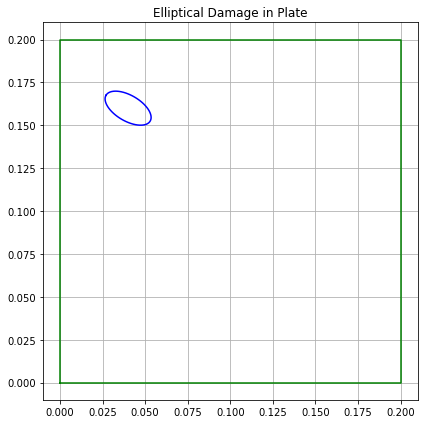

In [8]:
plate_x, plate_y = 0.2, 0.2 # Plate size

pos_x = 0.04
pos_y = 0.16
pos_z = 0.0125
theta_z = 150 # [°]
theta_y = 10
c = 0.03
r = 0.5
dam_var = (pos_x, pos_y, theta_z, c, r)

caf.plot_damage(dam_var)

# Generates variables database for cluster

Here we define the number of models to create by defining an integer value to `cluster_size` and the min and max bounds for each variable.

A few notes can be taken regarding the variable bounds:

- Bounds were defined in tuples.
- Position or length bounds cannot be altered independently so it doesn't creates damage outside of the plate region.
- $\theta$ bounds are defined so we have ellipsis pointing in all directions
- The ratio bounds were defined so we have between 20% (thin) and 100% (circle) damages.

The variables database was created by calling `rand_data()` that uses `numpy.random.random()` to create randon values between variable limits.

It was also generated a number between 1 and 4 and vstacked to `var_data` to represent the number of the damaged ply.

In [17]:
cluster_size = 1000

bounds_pos_x = (0.04, 0.16) 
bounds_pos_y = (0.04, 0.16)
bounds_pos_z = (0.0060, 0.00650)
bounds_theta_y = (-7.5, 7.5)
bounds_theta_z = (0, 180)
bounds_c = (0.015, 0.03)
bounds_r = (0.2, 0.35)

var_name = ('pos_x [m]', 'pos_y [m]', 'theta_z [°]', 'c [m]', 'r [m/m]', 'pos_z [m]', 'theta_y [°]')
var_bounds = (bounds_pos_x, bounds_pos_y, bounds_theta_z, bounds_c, bounds_r, bounds_pos_z, bounds_theta_y)
var_data = caf.rand_data(var_bounds, cluster_size)

Simple loop for plotting all defined damage models 
> It's recommended to disable this if the cluster size is too great.

> The red rectangle represents the max bounds for the position of the center of the ellipsis.

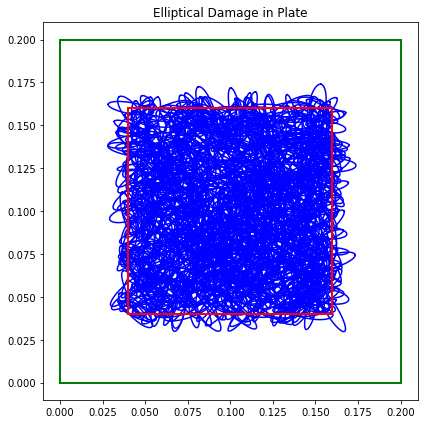

In [18]:
for i in range(len(var_data.T)):
    caf.plot_damage(var_data.T[i], min_bounds = bounds_pos_x[0], max_bounds = bounds_pos_y[1])

## Dataframe for managing variable data

This was done by using `Pandas` dataframe so it makes easier to visualize a large number of data.

In [19]:
var_dict = dict(zip(var_name,[i for i in var_data]))
df = pd.DataFrame(var_dict)
df

,pos_x [m],pos_y [m],theta_z [°],c [m],r [m/m],pos_z [m],theta_y [°]
0,0.053986,0.099418,21.772613,0.029013,0.235321,0.006292,0.757391
1,0.062702,0.062764,168.499752,0.026860,0.239066,0.006329,-2.092799
2,0.046486,0.064694,129.592918,0.023175,0.230222,0.006206,-6.016951
3,0.106295,0.141903,157.583248,0.026992,0.337651,0.006279,5.351441
4,0.124439,0.146964,114.484708,0.019425,0.285779,0.006120,-5.400418
...,...,...,...,...,...,...,...
995,0.076176,0.149468,60.156455,0.027175,0.223895,0.006097,-4.257602
996,0.090318,0.089884,77.395312,0.018255,0.302404,0.006409,0.019657
997,0.117042,0.044672,70.701809,0.019540,0.210934,0.006344,-2.312841
998,0.091827,0.150944,25.092292,0.019505,0.214696,0.006414,-3.704197


Simple scatter plotting for visaulizing randomness in variables dataframe.

Writing a .csv file with all damage variables 

In [20]:
df.to_csv('core_damage_variables.csv')